In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from utils.eval import score
from utils.models import CentroidSMOTE
from utils.models import KNNModel
from imblearn.over_sampling import SMOTE

# Reading, Preprocessing and EDA

In [3]:
Train_path = "../datasets/BuzzInSocialMedia/Twitter/Twitter.data"
train_df = pd.read_csv(Train_path, header = None)

Data description says it has no missing values and no categorical columns.

In [4]:
print(train_df.isnull().sum().sum(), train_df.isna().sum().sum())

0 0


In [5]:
list_dtype = [train_df[i].dtype for i in train_df.columns]
print(dict((i, list_dtype.count(i)) for i in list_dtype))

{dtype('int64'): 35, dtype('float64'): 43}


In [6]:
print((train_df.iloc[:, -1]).value_counts())

77
0.5       20770
1.0       19299
0.0       19094
1.5       17510
2.0       15254
          ...  
3737.0        1
3667.5        1
3708.5        1
3851.0        1
2129.5        1
Name: count, Length: 8123, dtype: int64


We have to predict whether there is a Buzz magnitude or not, i.e., whether the last column for the sample has 0 or any other value.

In [7]:
old_pred = train_df[77].to_numpy()
new_pred = []
for i in range(len(old_pred)):
    if old_pred[i] > 0.0:
        new_pred.append(1)
    else:
        new_pred.append(0)
train_df[77] = new_pred

In [8]:
train_df[77].value_counts()

77
1    564156
0     19094
Name: count, dtype: int64

In [9]:
scl = StandardScaler()
scl.fit(train_df)
scl.transform(train_df)
train_df, test_df = train_test_split(train_df, train_size = 0.9, random_state = 42) 
y_train = train_df[77]
y_test = test_df[77]
X_train = train_df.drop([77], axis = 1)
X_test = test_df.drop([77], axis = 1)

In [10]:
pipeline = Pipeline([
    ('classifier', KNeighborsClassifier(metric='euclidean'))
])

parameters = {
    'classifier__n_neighbors' : [3, 5, 7, 9, 11],
}

In [11]:
y_test = y_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.965469
Error Rate: 0.03453064723531929
Precision: 0.683344
Recall: 0.564970
F1-score: 0.592838
Selectivity: 0.564970
Balanced Accuracy: 0.564970
Geometric Mean: 0.564970


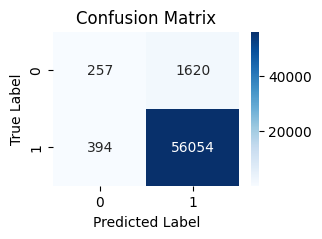

In [12]:
clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
score(X_test, y_test, best_clf)

Resampled dataset shape Counter({1: 507708, 0: 507708})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.920686
Error Rate: 0.07931418774110588
Precision: 0.588166
Recall: 0.701757
F1-score: 0.616598
Selectivity: 0.701757
Balanced Accuracy: 0.701757
Geometric Mean: 0.701757


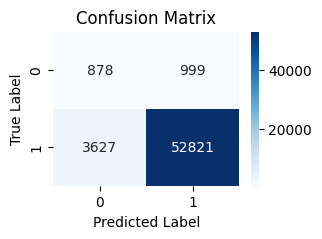

Resampled dataset shape Counter({1: 507708, 0: 507708})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.915268
Error Rate: 0.08473210458636948
Precision: 0.586770
Recall: 0.716727
F1-score: 0.616030
Selectivity: 0.716727
Balanced Accuracy: 0.716727
Geometric Mean: 0.716727


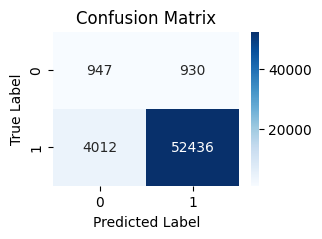

Resampled dataset shape Counter({1: 507708, 0: 507708})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.912387
Error Rate: 0.08761251607372478
Precision: 0.584736
Recall: 0.719359
F1-score: 0.613558
Selectivity: 0.719359
Balanced Accuracy: 0.719359
Geometric Mean: 0.719359


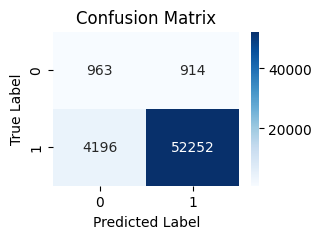

Resampled dataset shape Counter({1: 507708, 0: 507708})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.910913
Error Rate: 0.08908701243034722
Precision: 0.584366
Recall: 0.722976
F1-score: 0.613221
Selectivity: 0.722976
Balanced Accuracy: 0.722976
Geometric Mean: 0.722976


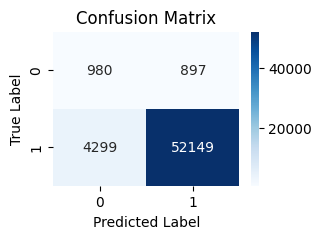

Resampled dataset shape Counter({1: 507708, 0: 507708})
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.909387
Error Rate: 0.09061294470638659
Precision: 0.584169
Recall: 0.727338
F1-score: 0.613106
Selectivity: 0.727338
Balanced Accuracy: 0.727338
Geometric Mean: 0.727338


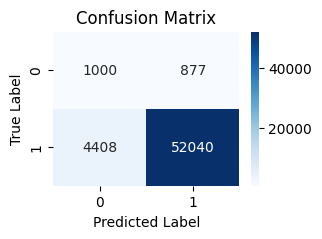

In [13]:
sm_list = []
from collections import Counter
for i in [3, 5, 7, 9, 11]:
    sm_list.append(SMOTE(random_state=42, k_neighbors=i))
for sm in sm_list:
    X_new, y_new = sm.fit_resample(X_train, y_train)
    print('Resampled dataset shape %s' % Counter(y_new))
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.910793
Error Rate: 0.08920702957565363
Precision: 0.588742
Recall: 0.740168
F1-score: 0.619694
Selectivity: 0.740168
Balanced Accuracy: 0.740168
Geometric Mean: 0.740168


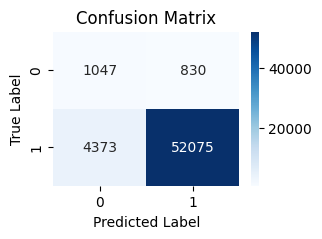

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.904449
Error Rate: 0.09555079297042435
Precision: 0.583794
Recall: 0.742041
F1-score: 0.612868
Selectivity: 0.742041
Balanced Accuracy: 0.742041
Geometric Mean: 0.742041


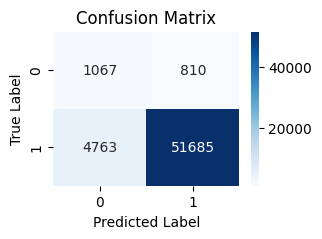

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.901054
Error Rate: 0.09894556365195029
Precision: 0.582815
Recall: 0.748785
F1-score: 0.611450
Selectivity: 0.748785
Balanced Accuracy: 0.748785
Geometric Mean: 0.748785


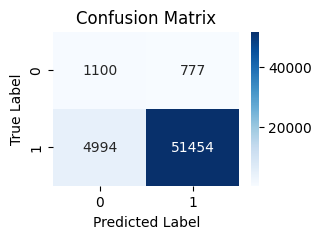

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.911599
Error Rate: 0.08840120017145303
Precision: 0.585081
Recall: 0.723330
F1-score: 0.614182
Selectivity: 0.723330
Balanced Accuracy: 0.723330
Geometric Mean: 0.723330


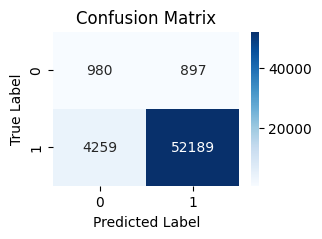

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Accuracy: 0.915148
Error Rate: 0.084852121731676
Precision: 0.584107
Recall: 0.707652
F1-score: 0.612132
Selectivity: 0.707652
Balanced Accuracy: 0.707652
Geometric Mean: 0.707652


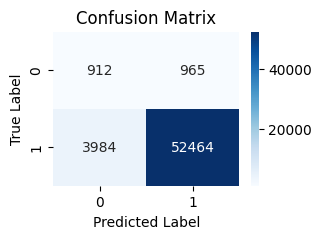

In [14]:
csm_list = []
for (i,j) in [(5,3), (7,3), (9,3), (7,5), (9,7)]:
    csm_list.append(CentroidSMOTE(k_neighbors=i, m_vertices=j))

for csm in csm_list:
    X_new, y_new = csm.fit_resample(X_train, y_train)
    pipeline = Pipeline([
        ('classifier', KNeighborsClassifier())
    ])

    parameters = {
        'classifier__n_neighbors' : [3, 5, 7, 9, 11],
    }

    clf = GridSearchCV(pipeline, param_grid = parameters, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_new, y_new)
    score(X_test, y_test, best_clf)